# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_1=sinasc_raw[['CONSPRENAT','MESPRENAT','munResLat']]
sinasc_1.head()

,CONSPRENAT,MESPRENAT,munResLat
0,8.0,1.0,-11.93554
1,10.0,2.0,-11.93554
2,8.0,1.0,-11.93554
3,6.0,2.0,-12.13178
4,8.0,2.0,-11.93554


In [6]:
sinasc_1['f_latitude'] = pd.cut(sinasc_1['munResLat'],
                                [-float('inf'), -10.5, float('inf')],
                                ['Abaixo de -10.5', 'Acima de -10.5'])

In [7]:
oprc = {
    'CONSPRENAT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'MESPRENAT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

sinasc_1.groupby('f_latitude').agg(oprc)

CONSPRENAT                                                   \
                     sum      mean  min   max median       std        var   
f_latitude                                                                  
(-inf, -10.5]   110072.0  8.591321  0.0  99.0    8.0  4.243102  18.003915   
(-10.5, inf]    105365.0  7.931125  0.0  99.0    8.0  5.863665  34.382564   

              MESPRENAT                                                     
                    sum      mean  min   max median        std         var  
f_latitude                                                                  
(-inf, -10.5]   93806.0  7.421361  1.0  99.0    2.0  21.325285  454.767769  
(-10.5, inf]   102609.0  8.906258  1.0  99.0    2.0  24.040978  577.968642

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_2=sinasc_raw[['QTDPARTNOR','QTDPARTCES','munResArea']]
sinasc_2.head()

,QTDPARTNOR,QTDPARTCES,munResArea
0,0.0,0.0,7067.025
1,0.0,1.0,7067.025
2,1.0,1.0,7067.025
3,0.0,0.0,3958.273
4,0.0,1.0,7067.025


In [9]:
sinasc_2['f_area'] = pd.cut(sinasc_2['munResArea'],
                            [-float('inf'), 3000, float('inf')],
                            ['Abaixo de 3000', 'Acima de 3000'])

In [10]:
oprc = {
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

sinasc_2.groupby('f_area').agg(oprc)

QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
f_area                                                                      
(-inf, 3000.0]     1912.0  0.371334  0.0  10.0    0.0  0.856441  0.733490   
(3000.0, inf]     12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
f_area                                                                     
(-inf, 3000.0]     2952.0  0.572981  0.0   5.0    0.0  0.749368  0.561553  
(3000.0, inf]     10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
sinasc_3=sinasc_raw[['QTDGESTANT','TPMETESTIM','munResAlt']]
sinasc_3.head()

,QTDGESTANT,TPMETESTIM,munResAlt
0,0.0,8.0,338.0
1,1.0,8.0,338.0
2,2.0,8.0,338.0
3,0.0,8.0,397.0
4,1.0,8.0,338.0


In [12]:
sinasc_3['f_altitude'] = pd.qcut(sinasc_3['munResAlt'],
                                 3,
                                 ['Baixo', 'Médio', 'Alto'])

In [13]:
oprc = {
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'TPMETESTIM': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

sinasc_3.groupby('f_altitude').agg(oprc)

QTDGESTANT                                                  \
                  sum      mean  min   max median       std       var   
f_altitude                                                              
Baixo         11762.0  1.461118  0.0  52.0    1.0  1.565417  2.450532   
Médio         11997.0  1.242826  0.0  15.0    1.0  1.399885  1.959678   
Alto           9157.0  1.128821  0.0  12.0    1.0  1.207607  1.458314   

           TPMETESTIM                                                  
                  sum      mean  min  max median       std        var  
f_altitude                                                             
Baixo         45796.0  5.465569  1.0  9.0    8.0  3.636977  13.227598  
Médio         65831.0  7.010756  1.0  9.0    8.0  2.416789   5.840868  
Alto          57349.0  7.150748  1.0  9.0    8.0  2.180894   4.756297

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

In [15]:
sinasc_4 = sinasc_raw[['IDADEMAE','munResNome']]
sinasc_4.head()

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste
3,30,Alto Alegre dos Parecis
4,30,Alta Floresta D'Oeste


In [16]:
sinasc_4 = sinasc_4.set_index('munResNome')

In [17]:
sinasc_4.groupby(imediatas).describe()

IDADEMAE                                                   
               count       mean       std   min   25%   50%   75%   max
munResNome                                                             
Ariquemes     3233.0  25.459635  6.137376  11.0  21.0  25.0  30.0  44.0
Cacoal        4603.0  26.347817  6.277692  13.0  21.0  26.0  31.0  53.0
Jaru          1683.0  25.708853  6.249344  12.0  21.0  25.0  30.0  45.0
Ji-Paraná     4962.0  26.094720  6.290577  12.0  21.0  26.0  31.0  52.0
Porto Velho  10096.0  26.166303  6.577656  12.0  21.0  26.0  31.0  47.0
Vilhena       2450.0  26.417143  6.343047  13.0  22.0  26.0  31.0  53.0

<Axes: xlabel='munResNome'>

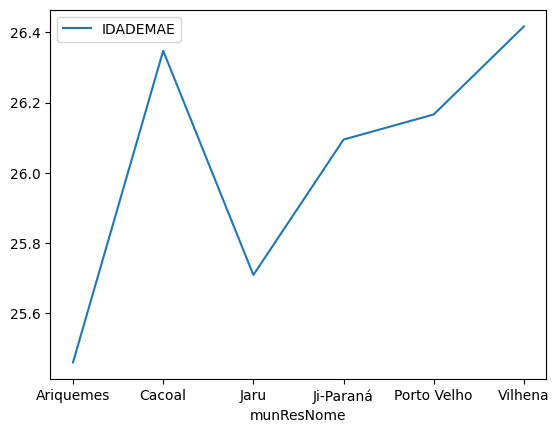

In [18]:
sinasc_4.groupby(imediatas).mean().plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [19]:
sinasc_5 = sinasc_raw[['IDADEMAE','munResNome']]
sinasc_5.head()

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste
3,30,Alto Alegre dos Parecis
4,30,Alta Floresta D'Oeste


In [20]:
sinasc_5_1 = sinasc_5.set_index('munResNome')
idh = {
    "Candeias do Jamari": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Nova Mamoré": "IDH-M baixo",
    "Porto Velho": "IDH-M alto",
    "Alto Paraíso": "IDH-M médio",
    "Ariquemes": "IDH-M alto",
    "Buritis": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Jaru": "IDH-M médio",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
    "Alvorada D'Oeste": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M médio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Cacoal": "IDH-M alto",
    "Castanheiras": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Vilhena": "IDH-M alto"
}

In [21]:
sinasc_5_1.groupby(idh).describe()

IDADEMAE                                                   
               count       mean       std   min   25%   50%   75%   max
munResNome                                                             
IDH-M alto   16855.0  26.280332  6.415374  12.0  21.0  26.0  31.0  47.0
IDH-M baixo   1826.0  25.326944  6.194908  13.0  20.0  25.0  29.0  46.0
IDH-M médio   8346.0  25.884855  6.353274  11.0  21.0  25.0  30.0  53.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [22]:
sinasc_5_2 = sinasc_5.set_index('munResNome')
ifdm = {
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Porto Velho": "Desenvolvimento moderado",
    "Alto Paraíso": "Desenvolvimento regular",
    "Ariquemes": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Jaru": "Desenvolvimento moderado",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento moderado",
    "Castanheiras": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado"
}

In [23]:
sinasc_5_2.groupby(ifdm).describe()

IDADEMAE                                         \
                            count       mean       std   min   25%   50%   
munResNome                                                                 
Desenvolvimento moderado  21946.0  26.223139  6.385869  12.0  21.0  26.0   
Desenvolvimento regular    5081.0  25.535131  6.363435  11.0  21.0  25.0   

                                      
                           75%   max  
munResNome                            
Desenvolvimento moderado  31.0  53.0  
Desenvolvimento regular   30.0  52.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [24]:
sinasc_5_3 = sinasc_5.set_index('munResNome')
pib = {
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Ariquemes": "Acima de 1 Bilhão",
    "Buritis": "Acima de 500 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão"
}

In [25]:
sinasc_5_3.groupby(pib).describe()

IDADEMAE                                               \
                        count       mean       std   min   25%   50%   75%   
munResNome                                                                   
Acima de 1 Bilhão     17736.0  26.265562  6.403777  12.0  21.0  26.0  31.0   
Acima de 100 Milhões   1952.0  25.662910  6.306384  12.0  21.0  25.0  30.0   
Acima de 200 Milhões    724.0  25.323204  6.064473  13.0  20.0  25.0  29.0   
Acima de 300 Milhões   1880.0  25.833511  6.273901  11.0  21.0  25.0  30.0   
Acima de 500 Milhões   4304.0  25.782528  6.469479  13.0  21.0  25.0  30.0   
Até 100 Milhões         431.0  26.515081  5.925831  14.0  22.0  26.0  31.0   

                            
                       max  
munResNome                  
Acima de 1 Bilhão     47.0  
Acima de 100 Milhões  52.0  
Acima de 200 Milhões  44.0  
Acima de 300 Milhões  53.0  
Acima de 500 Milhões  53.0  
Até 100 Milhões       41.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Os insights encontrados foram:
- Independente da região, PIB, IDH e IFDM, os valores de médias e desvio padrão de Idade da Mãe são semelhantes. De modo que, não é relevante o parametro de Idade da Mãe para classifica-los.
- A maior quantidade de nascimentos está concentrada em cidades com IDH-M alto,IFDM de Desenvolvimento moderado e PIB Acima de 1 Bilhão.
- A menor quantidade de nascimentos está concentrada em cidades com IDH-M baixo,IFDM de Desenvolvimento regular e PIB Até 100 Milhões.